In [1]:
#import libraries
import numpy 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.patches as mpatches
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import scipy.stats as st 
import dtale 
import warnings
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')
import pandas_profiling as pdp
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve

In [2]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

In [3]:
fd_ori=fd_dlvry.copy(deep=True)
#future uses one copy create

In [4]:
fd_dlvry.shape

(388, 55)

In [5]:
fd_dlvry.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [6]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    object 
 2   Marital Status                             388 non-null    object 
 3   Occupation                                 388 non-null    object 
 4   Monthly Income                             388 non-null    object 
 5   Educational Qualifications                 388 non-null    object 
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [7]:
# d = dtale.show(fd_dlvry)
# d.open_browser()
#we can use datle library for EDA

In [8]:
#looking data with pdp.ProfileReport 
# data = pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

# #Creating the Exploratory Data Analysis of our dataset
# report = pdp.ProfileReport(data, title='Pandas Profiling Report')

In [9]:
# report.widgets

In [10]:
#this library i found on google it's helpful for cleaning data,imputing value and lable encoding
import  datacleaner as dc # pip install datacleaner

In [11]:
dc.autoclean(fd_dlvry).head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [12]:
fd_dlvry.head() 

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,0,2,3,4,2,4,12.9766,77.5993,560001,...,1,1,1,1,1,1,1,1,1,136
1,24,0,2,3,2,0,3,12.9770,77.5773,560009,...,4,4,4,4,4,4,4,4,1,135
2,22,1,2,3,2,2,3,12.9551,77.6593,560017,...,0,4,1,4,4,0,4,1,1,119
3,22,0,2,3,4,0,6,12.9473,77.5616,560019,...,4,0,1,4,4,4,4,0,1,176
4,22,1,2,3,2,2,4,12.9850,77.5533,560010,...,0,0,1,0,0,0,4,4,1,129


In [13]:
fd_ori.head()

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,...,Less Delivery time,High Quality of package,Number of calls,Politeness,Freshness,Temperature,Good Taste,Good Quantity,Output,Reviews
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,...,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Moderately Important,Yes,Nil\n
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Yes,Nil
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,...,Important,Very Important,Moderately Important,Very Important,Very Important,Important,Very Important,Moderately Important,Yes,"Many a times payment gateways are an issue, so..."
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,...,Very Important,Important,Moderately Important,Very Important,Very Important,Very Important,Very Important,Important,Yes,nil
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,...,Important,Important,Moderately Important,Important,Important,Important,Very Important,Very Important,Yes,NIL


In [14]:
l1=(fd_ori.columns[:])
l1

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [15]:
fd_dlvry.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 55 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Age                                        388 non-null    int64  
 1   Gender                                     388 non-null    int32  
 2   Marital Status                             388 non-null    int32  
 3   Occupation                                 388 non-null    int32  
 4   Monthly Income                             388 non-null    int32  
 5   Educational Qualifications                 388 non-null    int32  
 6   Family size                                388 non-null    int64  
 7   latitude                                   388 non-null    float64
 8   longitude                                  388 non-null    float64
 9   Pin code                                   388 non-null    int64  
 10  Medium (P1)               

In [16]:
df=fd_ori.drop('Reviews',axis=1) #drop reviews because it's take NLP in future i will try it
df.columns

Index(['Age', 'Gender', 'Marital Status', 'Occupation', 'Monthly Income',
       'Educational Qualifications', 'Family size', 'latitude', 'longitude',
       'Pin code', 'Medium (P1)', 'Medium (P2)', 'Meal(P1)', 'Meal(P2)',
       'Perference(P1)', 'Perference(P2)', 'Ease and convenient',
       'Time saving', 'More restaurant choices', 'Easy Payment option',
       'More Offers and Discount', 'Good Food quality', 'Good Tracking system',
       'Self Cooking', 'Health Concern', 'Late Delivery', 'Poor Hygiene',
       'Bad past experience', 'Unavailability', 'Unaffordable',
       'Long delivery time', 'Delay of delivery person getting assigned',
       'Delay of delivery person picking up food', 'Wrong order delivered',
       'Missing item', 'Order placed by mistake', 'Influence of time',
       'Order Time', 'Maximum wait time', 'Residence in busy location',
       'Google Maps Accuracy', 'Good Road Condition', 'Low quantity low time',
       'Delivery person ability', 'Influence of 

In [17]:
%matplotlib inline

In [18]:
# we needs to back map for lable encoding 
lbl=dict()
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
                  lbl[i]=dict(zip(fd_ori[i].unique(), fd_dlvry[i].unique()))
    

In [19]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [20]:
# practice chi-squared test
# df=pd.crosstab(fd_ori['Meal(P1)'],fd_ori['Occupation'])
# df

# stat, p, dof, expected = st.chi2_contingency(df,correction=True)
# stat, p, dof, expected




#  method 1: Feature selection Cramér's V

In [21]:
#Cramer's V perform for find relation between 
crv={}
l1=[]
for i in fd_ori.columns:
    if i not in  ['latitude','longitude','Pin code','Output','Reviews']:
        '''we are not using lat and long because in EDA all location diffrent (reference dtale lib)'''
        df=pd.crosstab(fd_ori['Output'],fd_ori[i])
        stat, p, dof, expected = st.chi2_contingency(df,correction=True)
        t=min(df.shape)-1
        deno=sum(df.sum())*t
        x=numpy.sqrt(stat / deno)
        if(x>0.41): #thresold
             l1.append((i,x))


crv['Output']=l1
        
crv

{'Output': [('Age', 0.41916612670006054),
  ('Ease and convenient', 0.6944483749782563),
  ('Time saving', 0.6333333550979008),
  ('More restaurant choices', 0.5897138785369491),
  ('Easy Payment option', 0.5571767618313485),
  ('More Offers and Discount', 0.5564505912203883),
  ('Good Food quality', 0.4243449172824401),
  ('Good Tracking system', 0.41749280981704445),
  ('Maximum wait time', 0.4135981980209824)]}

In [22]:
#Extract the feature from above dictionary 
basic_f0=[]
for i in l1:
    basic_f0.append(i[0])

basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Maximum wait time']

In [23]:
X=fd_dlvry[basic_f0] # select X 
y=fd_dlvry['Output'] # select Y


In [24]:
%matplotlib inline

In [25]:
basic_f0

['Age',
 'Ease and convenient',
 'Time saving',
 'More restaurant choices',
 'Easy Payment option',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Maximum wait time']

<AxesSubplot:xlabel='Output', ylabel='count'>

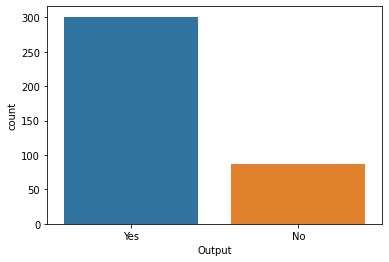

In [26]:
sns.countplot(fd_ori['Output']) # look target feature

#  KNN Algorithm  

In [27]:
# train_test_split by sklearn 
X=fd_dlvry[basic_f0]
y=fd_dlvry['Output']
# from imblearn.under_sampling import NearMiss
# nm=NearMiss()
# Make data balanced
from imblearn.over_sampling import RandomOverSampler
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [28]:
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [29]:
X.shape,y.shape

((451, 9), (451,))

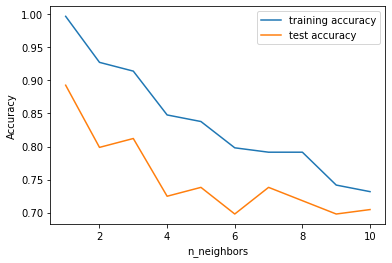

In [30]:
#select best knneighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

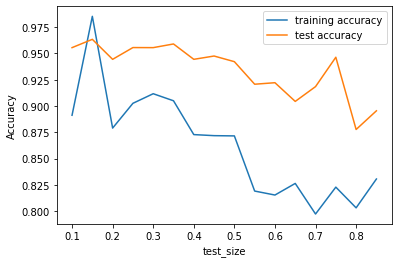

In [31]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 3,p=1)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_test, y_test))
        test_accuracy.append(knn.score(X_train, y_train))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [32]:
#split data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [33]:
# fit data and perform the knn algo
neigh = KNeighborsClassifier(n_neighbors=5,p=1)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)


0.8761061946902655

In [34]:
#y_pred for confusion matrix
y_pred=knn.predict(X_test)

In [35]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[28,  4],
       [10, 71]], dtype=int64)

In [36]:
#classification report 
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        32
           1       0.95      0.88      0.91        81

    accuracy                           0.88       113
   macro avg       0.84      0.88      0.86       113
weighted avg       0.89      0.88      0.88       113



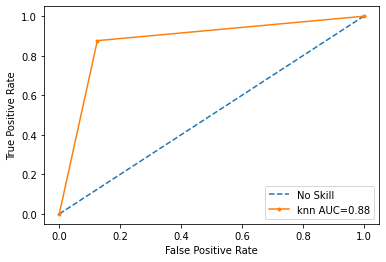

In [37]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion: </b>

In [38]:
'''Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms
'''

'Here weighted avg f1-score is good and AUC is greate but problems here Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms\n'

<b> Cross-Validation </b>

In [39]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8849573257467996 std :0.07473249127777068


In [40]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.868421052631579, 0.7368421052631579, 0.8947368421052632, 0.8157894736842105, 0.9210526315789473, 0.868421052631579, 0.9210526315789473, 0.8648648648648649, 0.8648648648648649, 0.9459459459459459, 0.8378378378378378, 0.9459459459459459]

Maximum Accuracy That can be obtained from this model is: 94.5945945945946 %

Minimum Accuracy: 73.68421052631578 %

Average Accuracy That can be obtained from this model is:: 0.873814604077762

Standard Deviation is: 0.056970422767758086


# method 2: feature selection using sklearn 

In [41]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2,mutual_info_classif

In [42]:
def select_features(X_train, y_train, X_test):
    fs = SelectKBest(score_func=chi2, k='all')
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs

In [43]:
#select feature 
l1=['latitude','longitude','Pin code','Output','Reviews']
X=fd_dlvry[fd_dlvry.columns[~fd_dlvry.columns.isin(l1)]]
y=fd_dlvry['Output']
nm=RandomOverSampler(0.5)
X,y=nm.fit_sample(X,y)
X.shape

(451, 50)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Feature 0: 10.648293
Feature 1: 0.078317
Feature 2: 16.802777
Feature 3: 26.237400
Feature 4: 11.890782
Feature 5: 6.225110
Feature 6: 0.138504
Feature 7: 0.191377
Feature 8: 1.064041
Feature 9: 0.119076
Feature 10: 0.013757
Feature 11: 4.560020
Feature 12: 0.021972
Feature 13: 4.753241
Feature 14: 2.199884
Feature 15: 0.980704
Feature 16: 9.685369
Feature 17: 5.672560
Feature 18: 3.133467
Feature 19: 0.301532
Feature 20: 31.139914
Feature 21: 5.782612
Feature 22: 11.461883
Feature 23: 0.017582
Feature 24: 14.180347
Feature 25: 4.786544
Feature 26: 10.439650
Feature 27: 0.885452
Feature 28: 0.225917
Feature 29: 17.383996
Feature 30: 0.200259
Feature 31: 0.329776
Feature 32: 0.326097
Feature 33: 0.965501
Feature 34: 20.344527
Feature 35: 24.248745
Feature 36: 9.474307
Feature 37: 4.023048
Feature 38: 9.093411
Feature 39: 2.398576
Feature 40: 0.724126
Feature 41: 0.763631
Feature 42: 2.221359
Feature 43: 0.254132
Feature 44: 0.238005
Feature 45: 9.405965
Feature 46: 19.055728
Feature 47:

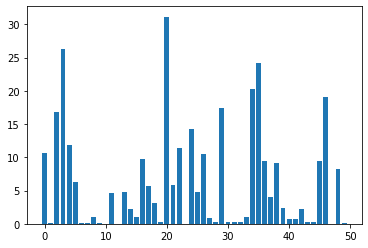

In [45]:
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
for i in range(len(fs.scores_)):
     print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)

plt.show()

In [46]:
# Extract feature 
basic_f1=[]
for i in range(len(fs.scores_)):
    if(fs.scores_[i]>10): # set Thresold
        print(X_test.columns[i])
        basic_f1.append(X_test.columns[i])

Age
Marital Status
Occupation
Monthly Income
Self Cooking
Late Delivery
Bad past experience
Unaffordable
Delay of delivery person picking up food
Order Time
Maximum wait time
Freshness 


# KNN Algorithm 

In [47]:
X=fd_dlvry[basic_f1]
y=fd_dlvry['Output']

nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

In [48]:
X.shape

(602, 12)

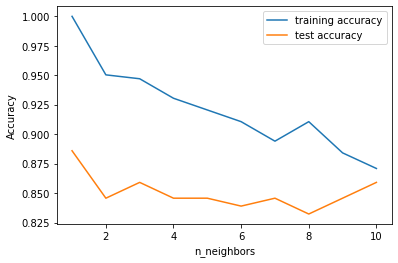

In [49]:
#neighbour find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)
for i in neighbors_settings:
    clf = KNeighborsClassifier(n_neighbors=i,p=1)
    clf.fit(X_train, y_train)
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
plt.plot(neighbors_settings,training_accuracy,label="training accuracy")
plt.plot(neighbors_settings,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()

plt.show()

In [50]:
# here some Extra work it's take long time to running
# plt.figure()
# training_accuracy = []
# test_accuracy = []
# # try n_neighbors from 1 to 10
# test_size= numpy.arange(0.1, 0.9,0.05)
# knn = KNeighborsClassifier(n_neighbors = 3)
# for i in test_size:
    
    
#     test_score = []
#     train_score=[]
#     for j in range(1,1000):
#         X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=6)
#         knn.fit(X_train, y_train)
#         test_score.append(knn.score(X_test, y_test))
#         train_score.append(knn.score(X_train, y_train))
  

       
#     training_accuracy.append(np.mean(train_score))
#     # record generalization accuracy
#     test_accuracy.append(np.mean(test_score))

# plt.plot(test_size,training_accuracy,label="training accuracy")
# plt.plot(test_size,test_accuracy,label="test accuracy")
# plt.ylabel("Accuracy")
# plt.xlabel("test_size")
# plt.legend()

# plt.show()

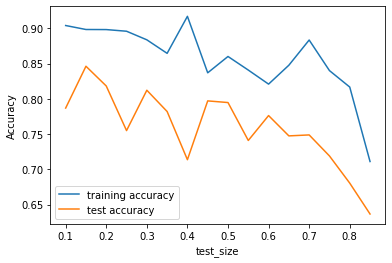

In [51]:
# appropriate test size find 
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)
knn = KNeighborsClassifier(n_neighbors = 5)
for i in test_size:
    
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        knn.fit(X_train, y_train)
        training_accuracy.append(knn.score(X_train,y_train))
        test_accuracy.append(knn.score(X_test,y_test))
  

    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()

In [52]:
#split data into test data and train data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4)

neigh = KNeighborsClassifier(n_neighbors=5)

knn=neigh.fit(X_train,y_train)

knn.score(X_test,y_test)

0.7800829875518672

In [53]:
y_pred=knn.predict(X_test)

In [54]:
#confusion matrix 
cf_matrix_n=confusion_matrix(y_test, y_pred)
cf_matrix_n

array([[ 88,  25],
       [ 28, 100]], dtype=int64)

In [55]:
#classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77       113
           1       0.80      0.78      0.79       128

    accuracy                           0.78       241
   macro avg       0.78      0.78      0.78       241
weighted avg       0.78      0.78      0.78       241



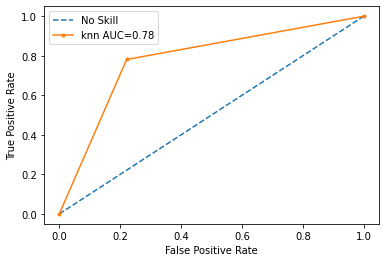

In [56]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds=roc_curve(y_test, y_pred)
AUC=round(metrics.auc(fpr, tpr),2)

plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label=f'knn AUC={AUC}')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()


<b> Conclusion:</b>

In [57]:
'''feature selection method affect our model,AUC decrease as compare to the first one'''

'feature selection method affect our model,AUC decrease as compare to the first one'

<b> Cross-Validation </b>

In [58]:
#without StratifiedKFold 
Knn=KNeighborsClassifier(n_neighbors=5,p=1)
score=cross_val_score(knn,X,y,cv=12)
print("mean:="+str(score.mean()),"std :"+str(score.std()))

mean:=0.8223529411764706 std :0.05276003870324306


In [59]:
#with StratifiedKFold 
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    knn.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(knn.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.7647058823529411, 0.8431372549019608, 0.8, 0.88, 0.76, 0.84, 0.8, 0.78, 0.74, 0.9, 0.88, 0.88]

Maximum Accuracy That can be obtained from this model is: 90.0 %

Minimum Accuracy: 74.0 %

Average Accuracy That can be obtained from this model is:: 0.8223202614379087

Standard Deviation is: 0.05285843408977901


#  Logistics Regression


In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
# Here we are using  both method for feature selection  means we takes union both feature union

f_feature=list(set(basic_f0).union(set(basic_f1)))

In [62]:
f_feature

['Time saving',
 'Order Time',
 'Good Food quality',
 'Delay of delivery person picking up food',
 'Marital Status',
 'Ease and convenient',
 'Maximum wait time',
 'Self Cooking',
 'Bad past experience',
 'Late Delivery',
 'More restaurant choices',
 'Good Tracking system',
 'Unaffordable',
 'Monthly Income',
 'Occupation',
 'Freshness ',
 'More Offers and Discount',
 'Age',
 'Easy Payment option']

In [63]:
# Now we need to use some domain knowlegde for selecting feature 
'''Group 1: {'Ease and convenient','Easy Payment option'}
   Group 2 :{'Order Time','Time saving','Delay of delivery person picking up food','Maximum wait time'}'''
f_feature=['Ease and convenient','Self Cooking','Maximum wait time','More restaurant choices',
 'Unaffordable','More Offers and Discount','Good Food quality','Good Tracking system','Age','Bad past experience']

In [64]:
#select X,y 

X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
from imblearn.under_sampling import NearMiss
# nm=NearMiss()
#try to making data balnaced 
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [65]:
X.shape

(602, 10)

In [66]:
f_feature

['Ease and convenient',
 'Self Cooking',
 'Maximum wait time',
 'More restaurant choices',
 'Unaffordable',
 'More Offers and Discount',
 'Good Food quality',
 'Good Tracking system',
 'Age',
 'Bad past experience']

In [67]:
Lg=LogisticRegression()

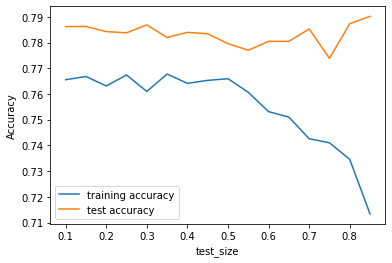

In [68]:
#
plt.figure()
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
test_size= numpy.arange(0.1, 0.9,0.05)

for i in test_size:
        t_s=[]
        tn_=[]
        for j in range(0,50):
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i,random_state=np.random.randint(0,100))
            Lg.fit(X_train, y_train)
            
            t_s.append(Lg.score(X_test,y_test))
            tn_.append(Lg.score(X_train,y_train))
        training_accuracy.append(np.mean(t_s))
        test_accuracy.append(np.mean(tn_))


    
plt.plot(test_size,training_accuracy,label="training accuracy")
plt.plot(test_size,test_accuracy,label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("test_size")
plt.legend()

plt.show()




In [69]:
#data split into train and test size 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)
Lg.fit(X_train,y_train)
Lg.score(X_test,y_test)

0.7292817679558011

In [70]:
y_pred=Lg.predict(X_test)

In [71]:
cf_matrix=confusion_matrix(y_test, y_pred)
cf_matrix

array([[66, 25],
       [24, 66]], dtype=int64)

In [72]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      0.73      0.73        91
           1       0.73      0.73      0.73        90

    accuracy                           0.73       181
   macro avg       0.73      0.73      0.73       181
weighted avg       0.73      0.73      0.73       181



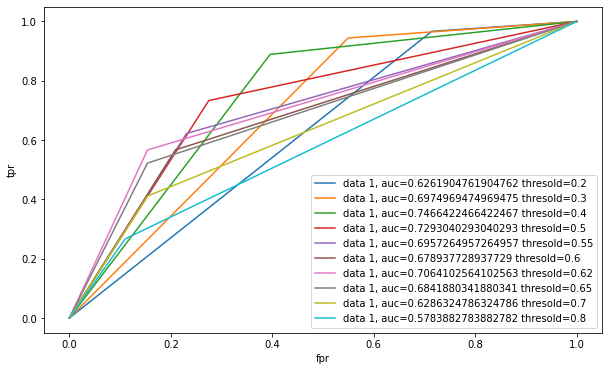

In [73]:
thresolds = [0.2,0.3,0.4,0.5,0.55,0.6,0.62,0.65,0.7,0.8]
plt.figure(figsize=(10,6))
for i in thresolds:
    y_pred_proba = (Lg.predict_proba(X_test)[:,1]>=i).astype(int)
    fpr, tpr, m= metrics.roc_curve(y_test,  y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr,label=f"data 1, auc={auc} thresold={i}")
    plt.legend(loc=4)



plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()

In [74]:
'''In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something
knn just use more memory space for perform operation and mostly features are categorical so noise affect
on this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms 
something learn 
'''

'In Knn weighted avg f1-score is good and AUC is great but problems in Knn is not learning something\nknn just use more memory space for perform operation and mostly features are categorical so noise affect\non this algorithms. Here we can see if we set thresold 0.65 in Logistics regression we get better model  and here algorithms \nsomething learn \n'

<b> Cross-Validation </b>

In [75]:
score=cross_val_score(Lg,X,y,cv=10)
print('List of possible accuracy:', score) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(score)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(score)) 
print('\nStandard Deviation is:',np.std(score)) 

List of possible accuracy: [0.73770492 0.81967213 0.83333333 0.85       0.71666667 0.73333333
 0.8        0.76666667 0.73333333 0.7       ]

Maximum Accuracy That can be obtained from this model is: 85.0 %

Minimum Accuracy: 74.0 %

Average Accuracy That can be obtained from this model is:: 0.7690710382513661

Standard Deviation is: 0.05025656055507464


In [76]:
import numpy as np
from sklearn.model_selection import StratifiedKFold 
skf = StratifiedKFold(n_splits=12, shuffle=True, random_state=1) 
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    Lg.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.6862745098039216, 0.7647058823529411, 0.86, 0.74, 0.78, 0.76, 0.7, 0.8, 0.76, 0.76, 0.88, 0.82]

Maximum Accuracy That can be obtained from this model is: 88.0 %

Minimum Accuracy: 68.62745098039215 %

Average Accuracy That can be obtained from this model is:: 0.7759150326797385

 Median Accuracy That can be obtained from this model is:: 0.7623529411764706

Standard Deviation is: 0.055089422798305865


In [77]:
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)
cross_val_score(Lg, X, y, cv=cv)

array([0.73480663, 0.77348066, 0.75138122, 0.82320442, 0.77900552])

# DecisionTree (feature selection with both method)  

In [78]:
X=fd_dlvry[f_feature]
y=fd_dlvry['Output']
nm=RandomOverSampler() # try to making data balanced 
X,y=nm.fit_sample(X,y)
fd_dlvry['Output'].value_counts()

1    301
0     87
Name: Output, dtype: int64

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [80]:
clf.score(X_test,y_test)

0.9296482412060302

In [81]:
y_pred=clf.predict(X_test)
y_pred

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1])

In [82]:
print(confusion_matrix(y_test,y_pred))

[[91 12]
 [ 2 94]]


In [83]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       103
           1       0.89      0.98      0.93        96

    accuracy                           0.93       199
   macro avg       0.93      0.93      0.93       199
weighted avg       0.93      0.93      0.93       199



In [84]:
cross_val_score(clf, X, y, cv=12)

array([0.90196078, 0.84313725, 0.9       , 0.88      , 0.86      ,
       0.98      , 0.9       , 0.96      , 0.92      , 0.98      ,
       0.86      , 0.96      ])

In [85]:
lst_accu_stratified = [] 

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold) 
    lst_accu_stratified.append(Lg.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.7450980392156863, 0.7843137254901961, 0.84, 0.8, 0.8, 0.78, 0.8, 0.86, 0.8, 0.72, 0.82, 0.8]

Maximum Accuracy That can be obtained from this model is: 86.0 %

Minimum Accuracy: 72.0 %

Average Accuracy That can be obtained from this model is:: 0.7957843137254903

 Median Accuracy That can be obtained from this model is:: 0.8

Standard Deviation is: 0.03587829006606706


In [86]:
import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('gini')
# graph

'gini.png'

# Feature selection with Decision Tree 

In [87]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [88]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [89]:
l1=[]
for i in df.columns:
    if(i!='Output'):
        l1.append(i)
    

In [90]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [92]:
clf.score(X_test,y_test)

0.9748743718592965

In [93]:
clf.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.02710328, 0.        , 0.        , 0.        , 0.        ,
       0.05554075, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01027604, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.43854729,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.12868808,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.00075225, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [94]:
def feature_extract(clf,l1):
    values = clf.feature_importances_
    importances = [(l1[i], values[i]) for i in range(len(l1))]
    importances.sort(reverse=True, key=lambda x:x[1])
    l3=[]
    for i in importances[:12]:
        l3.append(i[0])
    return l3

    

In [95]:
feature_extract(clf,l1)

['Ease and convenient_Disagree',
 'More restaurant choices_Disagree',
 'Unaffordable_Agree',
 'High Quality of package_Very Important',
 'Occupation_Student',
 'Unavailability_Disagree',
 'Marital Status_Prefer not to say',
 'Bad past experience_Disagree',
 'Late Delivery_Disagree',
 'Residence in busy location_Neutral',
 'Missing item_Strongly agree',
 'High Quality of package_Important']

In [96]:
X=df[l1]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [98]:
clf.score(X_test,y_test)

0.9798994974874372

In [99]:
y_pred=clf.predict(X_test)
y_pred

array([0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0], dtype=int64)

In [100]:
print(confusion_matrix(y_test,y_pred))

[[104   1]
 [  3  91]]


In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       105
           1       0.99      0.97      0.98        94

    accuracy                           0.98       199
   macro avg       0.98      0.98      0.98       199
weighted avg       0.98      0.98      0.98       199



In [102]:
lst_accu_stratified = [] 
x=0
feature_common=pd.DataFrame()
for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    feature_common[x]=feature_extract(clf,l1)
    x+=1
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.9607843137254902, 0.9215686274509803, 0.98, 0.94, 0.96, 0.9, 0.9, 0.9, 0.98, 0.88, 0.94, 0.94]

Maximum Accuracy That can be obtained from this model is: 98.0 %

Minimum Accuracy: 88.0 %

Average Accuracy That can be obtained from this model is:: 0.9335294117647059

 Median Accuracy That can be obtained from this model is:: 0.94

Standard Deviation is: 0.03197561707216874


In [103]:
feature_common

,0,1,2,3,4,5,6,7,8,9,10,11
0,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree,Ease and convenient_Disagree
1,More restaurant choices_Disagree,Time saving_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,More restaurant choices_Disagree,Time saving_Disagree,More restaurant choices_Disagree
2,Unaffordable_Agree,Missing item_Neutral,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Unaffordable_Agree,Missing item_Neutral,Unaffordable_Agree
3,Occupation_Student,More restaurant choices_Disagree,Occupation_Student,Occupation_Student,Age,Occupation_Student,Occupation_Student,Occupation_Student,Occupation_Student,Occupation_Student,More restaurant choices_Disagree,Occupation_Student
4,Missing item_Neutral,Politeness_Very Important,Missing item_Neutral,Missing item_Neutral,High Quality of package_Very Important,High Quality of package_Very Important,Missing item_Neutral,Health Concern_Agree,Missing item_Neutral,High Quality of package_Very Important,Good Food quality_Agree,Missing item_Neutral
5,Maximum wait time_15 minutes,Good Taste _Important,Perference(P2)_ Sweets,Good Food quality_Agree,Unavailability_Disagree,Unavailability_Disagree,Unavailability_Disagree,Monthly Income_No Income,Maximum wait time_15 minutes,Unavailability_Disagree,Politeness_Very Important,Perference(P2)_ Sweets
6,Perference(P2)_ Sweets,Influence of time_No,Maximum wait time_15 minutes,Perference(P2)_ Sweets,Missing item_Disagree,Missing item_Disagree,Maximum wait time_15 minutes,Unavailability_Disagree,Unavailability_Disagree,Marital Status_Prefer not to say,Influence of time_No,Unavailability_Disagree
7,Unavailability_Disagree,Occupation_Student,Unavailability_Disagree,Late Delivery_Disagree,Marital Status_Prefer not to say,Marital Status_Prefer not to say,Perference(P2)_ Sweets,Late Delivery_Disagree,Perference(P2)_ Sweets,Meal(P1)_Breakfast,Unaffordable_Strongly disagree,Maximum wait time_15 minutes
8,Late Delivery_Disagree,Wrong order delivered_Strongly disagree,Late Delivery_Disagree,Wrong order delivered_Strongly disagree,Good Tracking system_Agree,Residence in busy location_Neutral,Delay of delivery person getting assigned_Stro...,Residence in busy location_Neutral,Late Delivery_Disagree,Maximum wait time_45 minutes,Good Food quality_Neutral,Late Delivery_Disagree
9,Delay of delivery person getting assigned_Stro...,Late Delivery_Disagree,Missing item_Strongly agree,Delay of delivery person getting assigned_Stro...,Late Delivery_Disagree,Late Delivery_Disagree,Wrong order delivered_Strongly disagree,Educational Qualifications_Post Graduate,Wrong order delivered_Strongly disagree,Missing item_Strongly agree,Wrong order delivered_Strongly disagree,Delay of delivery person getting assigned_Stro...


In [104]:
l2=feature_extract(clf,l1)

In [105]:
relation_between_feature=pd.DataFrame(index=l2)

In [106]:
relation_between_feature.head()

""
Ease and convenient_Disagree
More restaurant choices_Disagree
Unaffordable_Agree
Occupation_Student
Missing item_Neutral


In [107]:
X[l2]

,Ease and convenient_Disagree,More restaurant choices_Disagree,Unaffordable_Agree,Occupation_Student,Missing item_Neutral,Perference(P2)_ Sweets,Unavailability_Disagree,Maximum wait time_15 minutes,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,Wrong order delivered_Strongly disagree,Long delivery time_Agree
0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,0,0,1,0,0,0,0,0,1,0,0
2,0,0,1,1,0,0,0,0,0,0,0,1
3,0,0,0,1,0,0,1,0,0,0,0,1
4,0,0,0,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
597,1,0,1,1,0,0,0,0,0,0,0,0
598,0,0,1,0,0,0,1,0,0,0,0,1
599,0,1,0,0,0,0,1,1,0,0,0,1
600,1,0,0,1,0,0,0,1,0,0,0,0


In [108]:

for i in l2:
    l1=[]
    for j in l2:
        df_t=pd.crosstab(X[j],X[i])
        stat, p, dof, expected = st.chi2_contingency(df_t,correction=True)
        t=min(df_t.shape)-1
        deno=sum(df_t.sum())
        x=np.sqrt(stat / deno)
        l1.append(x)
    relation_between_feature[i]=l1
    



        


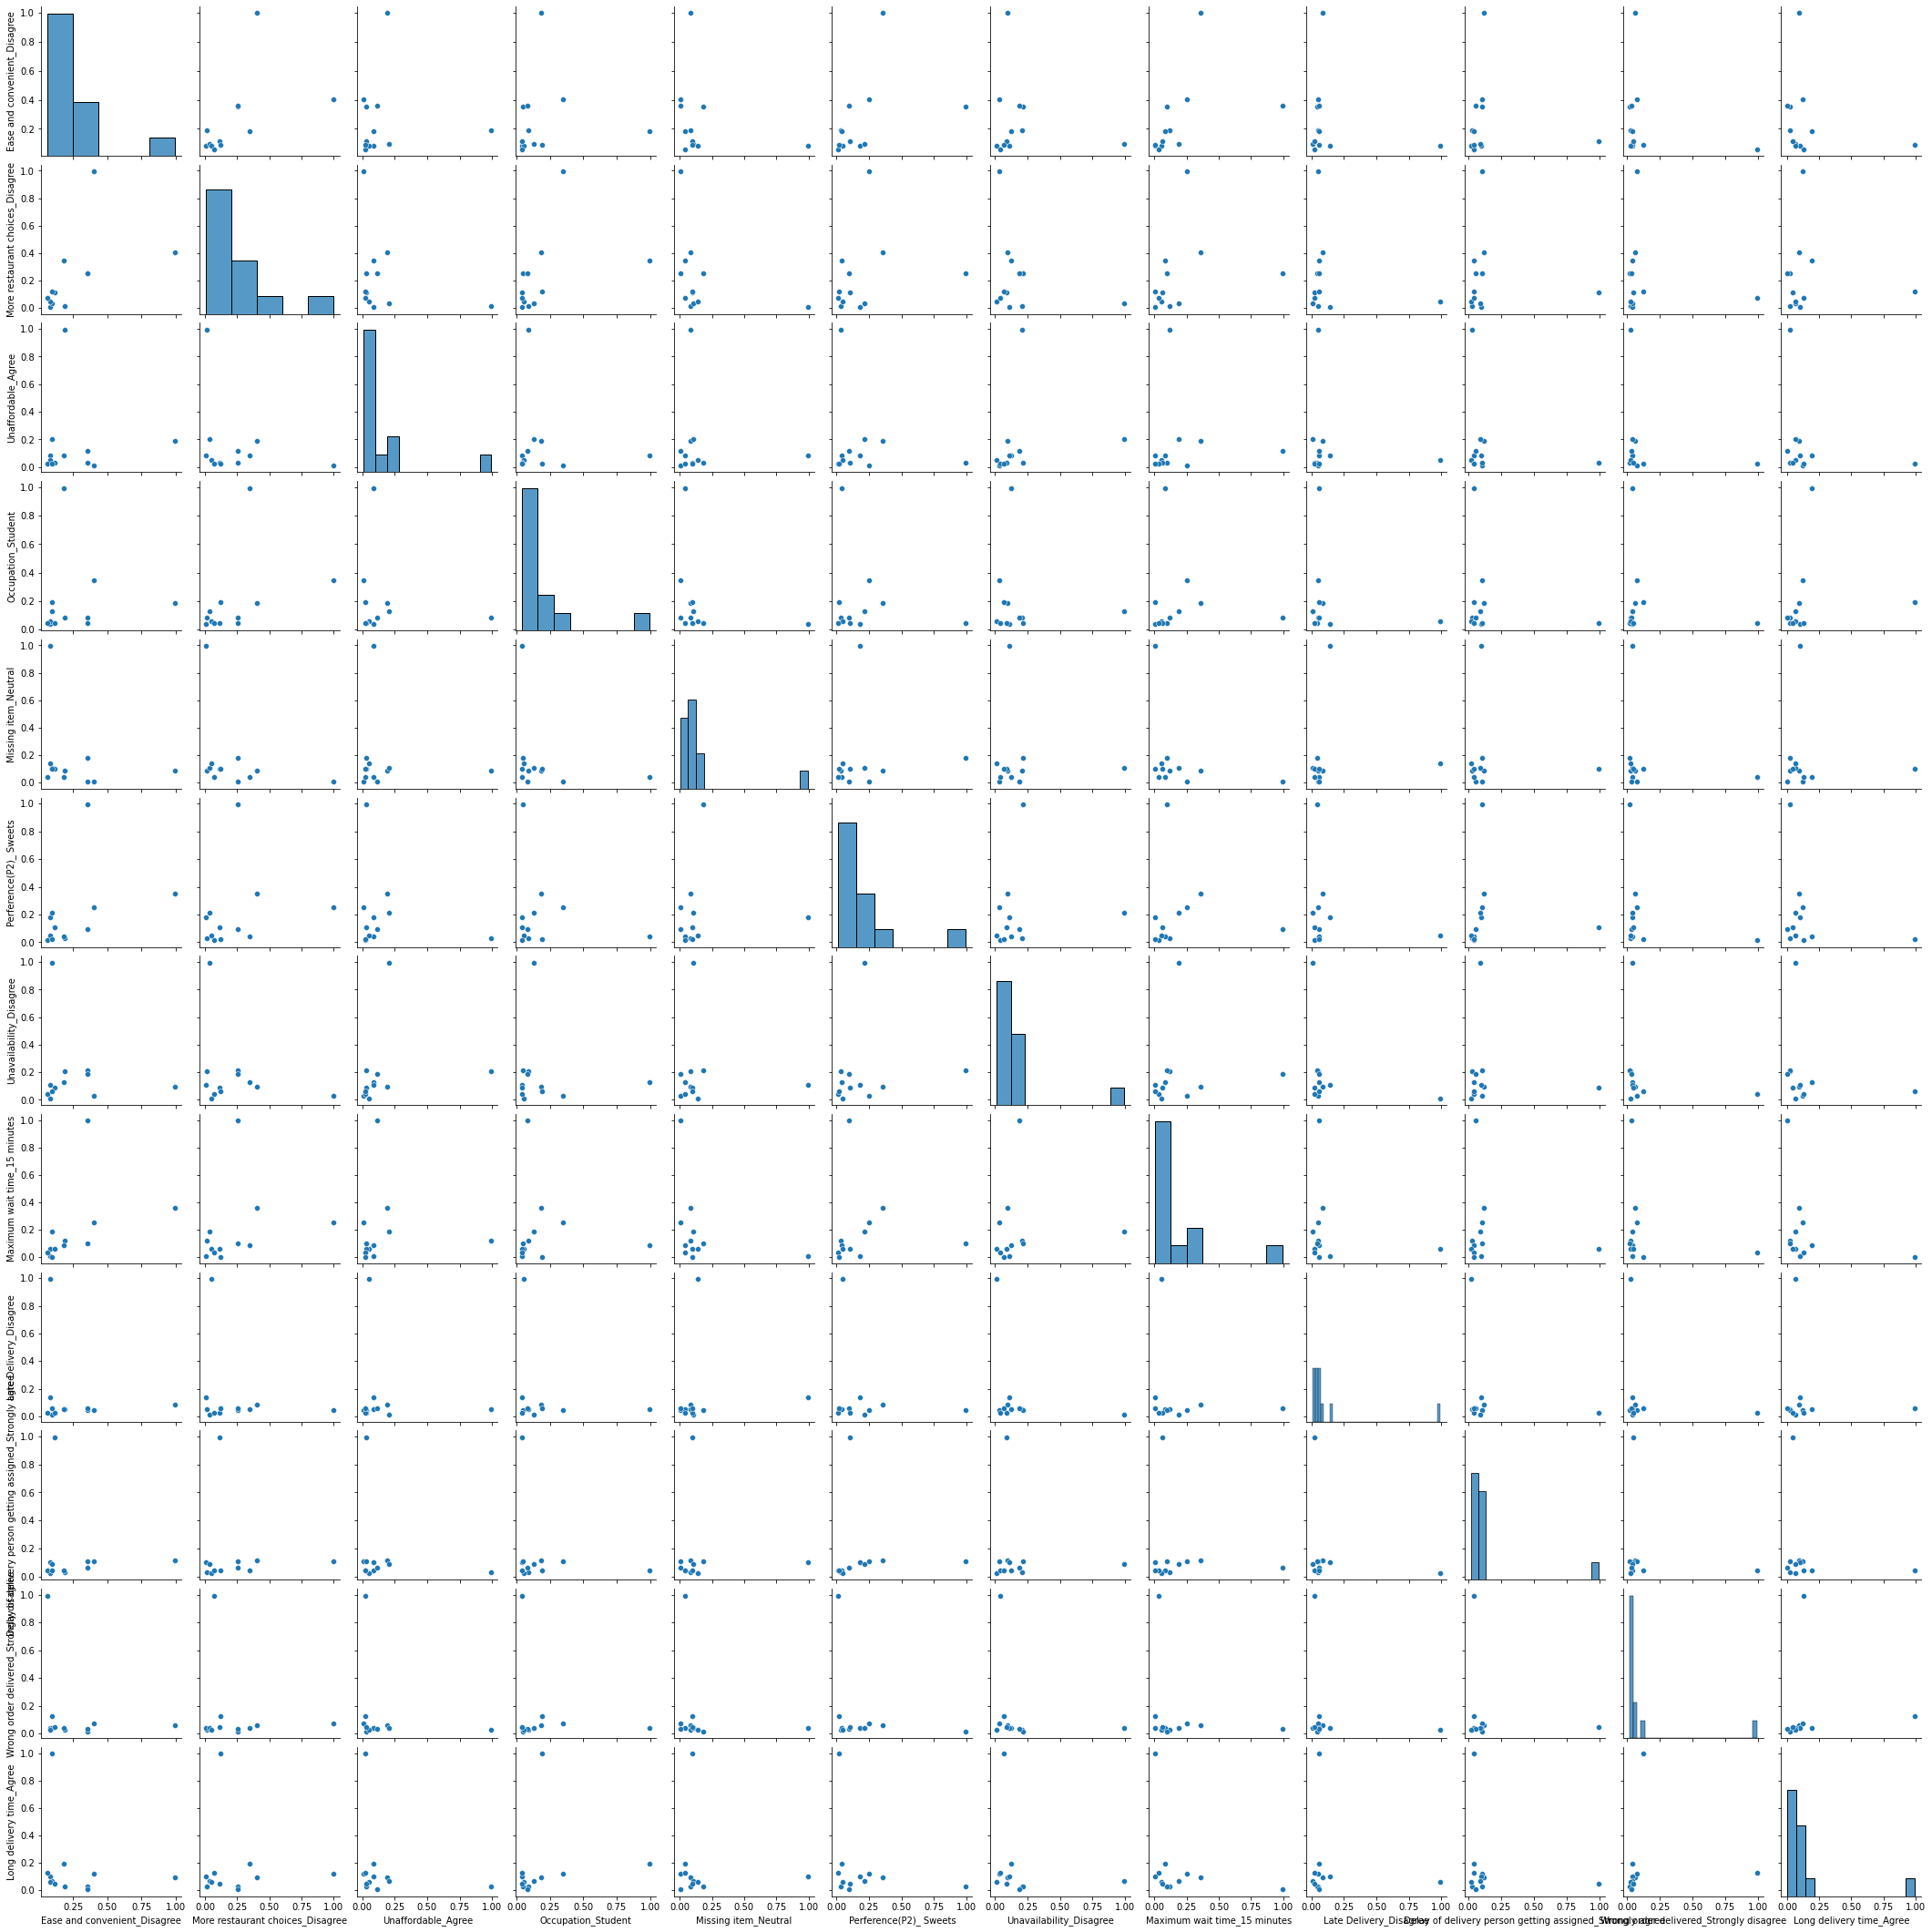

In [109]:
sns.pairplot(relation_between_feature)

In [110]:
relation_between_feature

,Ease and convenient_Disagree,More restaurant choices_Disagree,Unaffordable_Agree,Occupation_Student,Missing item_Neutral,Perference(P2)_ Sweets,Unavailability_Disagree,Maximum wait time_15 minutes,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,Wrong order delivered_Strongly disagree,Long delivery time_Agree
Ease and convenient_Disagree,0.995999,0.404997,0.190178,0.183500,0.082956,0.352582,0.095367,0.357392,0.082110,0.117381,0.061740,0.092653
More restaurant choices_Disagree,0.404997,0.995369,0.010990,0.347674,0.003370,0.252408,0.030813,0.251455,0.047316,0.109788,0.070621,0.119507
Unaffordable_Agree,0.190178,0.010990,0.995299,0.085162,0.085088,0.031962,0.204847,0.115411,0.053149,0.029897,0.023620,0.021571
Occupation_Student,0.183500,0.347674,0.085162,0.996635,0.039387,0.044323,0.126423,0.082358,0.054027,0.042307,0.041418,0.190967
Missing item_Neutral,0.082956,0.003370,0.085088,0.039387,0.994275,0.181202,0.107111,0.006735,0.138876,0.098696,0.040938,0.098772
Perference(P2)_ Sweets,0.352582,0.252408,0.031962,0.044323,0.181202,0.994763,0.215740,0.097878,0.046639,0.105024,0.015098,0.023378
Unavailability_Disagree,0.095367,0.030813,0.204847,0.126423,0.107111,0.215740,0.996452,0.186992,0.010490,0.091263,0.039843,0.064370
Maximum wait time_15 minutes,0.357392,0.251455,0.115411,0.082358,0.006735,0.097878,0.186992,0.994553,0.056410,0.060427,0.031094,0.001597
Late Delivery_Disagree,0.082110,0.047316,0.053149,0.054027,0.138876,0.046639,0.010490,0.056410,0.993906,0.023251,0.023330,0.059960
Delay of delivery person getting assigned_Strongly agree,0.117381,0.109788,0.029897,0.042307,0.098696,0.105024,0.091263,0.060427,0.023251,0.993345,0.044092,0.043692


In [111]:
fd_dlvry.shape

(388, 51)

In [112]:
lbl

{'Age': {20: 20,
  24: 24,
  22: 22,
  27: 27,
  23: 23,
  21: 21,
  28: 28,
  25: 25,
  32: 32,
  30: 30,
  31: 31,
  26: 26,
  18: 18,
  19: 19,
  33: 33,
  29: 29},
 'Gender': {'Female': 0, 'Male': 1},
 'Marital Status': {'Single': 2, 'Married': 0, 'Prefer not to say': 1},
 'Occupation': {'Student': 3,
  'Employee': 0,
  'Self Employeed': 2,
  'House wife': 1},
 'Monthly Income': {'No Income': 4,
  'Below Rs.10000': 2,
  'More than 50000': 3,
  '10001 to 25000': 0,
  '25001 to 50000': 1},
 'Educational Qualifications': {'Post Graduate': 2,
  'Graduate': 0,
  'Ph.D': 1,
  'Uneducated': 4,
  'School': 3},
 'Family size': {4: 4, 3: 3, 6: 6, 2: 2, 5: 5, 1: 1},
 'Medium (P1)': {'Food delivery apps': 1,
  'Walk-in': 2,
  'Direct call': 0,
  'Web browser': 3},
 'Medium (P2)': {' Web browser': 2, ' Direct call': 0, ' Walk-in': 1},
 'Meal(P1)': {'Breakfast': 0, 'Snacks': 3, 'Lunch': 2, 'Dinner': 1},
 'Meal(P2)': {' Lunch': 1, ' Dinner': 0, ' Snacks': 2},
 'Perference(P1)': {'Non Veg foods (L

In [121]:
relation_between_feature.style.apply(lambda x: ["background: red" if v>0.25 and v<0.99 else "" for v in x], axis = 1)

,Ease and convenient_Disagree,More restaurant choices_Disagree,Unaffordable_Agree,Occupation_Student,Missing item_Neutral,Perference(P2)_ Sweets,Unavailability_Disagree,Maximum wait time_15 minutes,Late Delivery_Disagree,Delay of delivery person getting assigned_Strongly agree,Wrong order delivered_Strongly disagree,Long delivery time_Agree
Ease and convenient_Disagree,0.995999,0.404997,0.190178,0.183500,0.082956,0.352582,0.095367,0.357392,0.082110,0.117381,0.061740,0.092653
More restaurant choices_Disagree,0.404997,0.995369,0.010990,0.347674,0.003370,0.252408,0.030813,0.251455,0.047316,0.109788,0.070621,0.119507
Unaffordable_Agree,0.190178,0.010990,0.995299,0.085162,0.085088,0.031962,0.204847,0.115411,0.053149,0.029897,0.023620,0.021571
Occupation_Student,0.183500,0.347674,0.085162,0.996635,0.039387,0.044323,0.126423,0.082358,0.054027,0.042307,0.041418,0.190967
Missing item_Neutral,0.082956,0.003370,0.085088,0.039387,0.994275,0.181202,0.107111,0.006735,0.138876,0.098696,0.040938,0.098772
Perference(P2)_ Sweets,0.352582,0.252408,0.031962,0.044323,0.181202,0.994763,0.215740,0.097878,0.046639,0.105024,0.015098,0.023378
Unavailability_Disagree,0.095367,0.030813,0.204847,0.126423,0.107111,0.215740,0.996452,0.186992,0.010490,0.091263,0.039843,0.064370
Maximum wait time_15 minutes,0.357392,0.251455,0.115411,0.082358,0.006735,0.097878,0.186992,0.994553,0.056410,0.060427,0.031094,0.001597
Late Delivery_Disagree,0.082110,0.047316,0.053149,0.054027,0.138876,0.046639,0.010490,0.056410,0.993906,0.023251,0.023330,0.059960
Delay of delivery person getting assigned_Strongly agree,0.117381,0.109788,0.029897,0.042307,0.098696,0.105024,0.091263,0.060427,0.023251,0.993345,0.044092,0.043692


In [136]:
multicolinear_feature=["Perference(P2)_ Sweets","Maximum wait time_15 minutes","More restaurant choices_Disagree"]

In [137]:
final_feature=list(relation_between_feature.columns)

In [138]:
final_feature

['Ease and convenient_Disagree',
 'More restaurant choices_Disagree',
 'Unaffordable_Agree',
 'Occupation_Student',
 'Missing item_Neutral',
 'Perference(P2)_ Sweets',
 'Unavailability_Disagree',
 'Maximum wait time_15 minutes',
 'Late Delivery_Disagree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Wrong order delivered_Strongly disagree',
 'Long delivery time_Agree']

In [146]:
set1 = set(final_feature)
set2 = set(multicolinear_feature)
final_feature = list(set1 - set2)

In [148]:
final_feature

['Unaffordable_Agree',
 'Delay of delivery person getting assigned_Strongly agree',
 'Long delivery time_Agree',
 'Wrong order delivered_Strongly disagree',
 'Missing item_Neutral',
 'Unavailability_Disagree',
 'Occupation_Student',
 'Ease and convenient_Disagree',
 'Late Delivery_Disagree']

In [140]:

import graphviz
import sklearn.tree as tree
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names='01',
                                filled=True)

# # Draw graph
graph = graphviz.Source(dot_data,format="png") 
graph.render('fgini')
# graph

'fgini.png'

# Final model

In [201]:
fd_dlvry=pd.read_csv('../../data/Banglore_food_delivery/onlinedeliverydata.csv')

fd_dlvry.drop(['Pin code','longitude','latitude','Reviews'],axis=1,inplace=True)

fd_dlvry['Output']=fd_dlvry['Output'].replace({'Yes':1,'No':0})

In [202]:
fd_ori=fd_dlvry.copy(deep=True)
df=pd.get_dummies(fd_dlvry)
df.shape

(388, 223)

In [203]:
X=df[final_feature]
y=df['Output']
nm=RandomOverSampler()
X,y=nm.fit_sample(X,y)


In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)
clf=DecisionTreeClassifier(random_state=0,max_depth=6,min_samples_leaf=2,min_samples_split=4)
clf.fit(X,y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=2, min_samples_split=4,
                       random_state=0)

In [205]:
clf.score(X_test,y_test)

0.9045226130653267

In [206]:
y_pred=clf.predict(X_test)
y_pred

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1], dtype=int64)

In [207]:
print(confusion_matrix(y_test,y_pred))

[[ 73  15]
 [  4 107]]


In [208]:
lst_accu_stratified = [] 
x=0

for train_index, test_index in skf.split(X, y): 
    x_train_fold, x_test_fold = X.loc[train_index,:], X.loc[test_index,:] 
    y_train_fold, y_test_fold = y[train_index], y[test_index] 
    clf.fit(x_train_fold, y_train_fold)
    lst_accu_stratified.append(clf.score(x_test_fold, y_test_fold))
    
    
print('List of possible accuracy:', lst_accu_stratified) 
print('\nMaximum Accuracy That can be obtained from this model is:', 
      max(lst_accu_stratified)*100, '%') 
print('\nMinimum Accuracy:', 
      min(lst_accu_stratified)*100, '%') 
print('\nAverage Accuracy That can be obtained from this model is::',np.mean(lst_accu_stratified)) 
print('\n Median Accuracy That can be obtained from this model is::',np.median(lst_accu_stratified)) 
print('\nStandard Deviation is:',np.std(lst_accu_stratified)) 

List of possible accuracy: [0.8627450980392157, 0.7254901960784313, 0.88, 0.9, 0.88, 0.86, 0.84, 0.92, 0.84, 0.92, 0.94, 0.88]

Maximum Accuracy That can be obtained from this model is: 94.0 %

Minimum Accuracy: 72.54901960784314 %

Average Accuracy That can be obtained from this model is:: 0.870686274509804

 Median Accuracy That can be obtained from this model is:: 0.88

Standard Deviation is: 0.05317429309942066


In [219]:
list_1=[1,0,1,0,1,0,0,0,0]
pre=np.array(list_1).reshape(1,-1)
nk=dict(zip(X_test.columns,list_1))
nk


{'Unaffordable_Agree': 1,
 'Delay of delivery person getting assigned_Strongly agree': 0,
 'Long delivery time_Agree': 1,
 'Wrong order delivered_Strongly disagree': 0,
 'Missing item_Neutral': 1,
 'Unavailability_Disagree': 0,
 'Occupation_Student': 0,
 'Ease and convenient_Disagree': 0,
 'Late Delivery_Disagree': 0}

In [220]:
# import graphviz
# import sklearn.tree as tree
# # DOT data
# dot_data = tree.export_graphviz(clf, out_file=None, 
#                                 feature_names=X_test.columns,  
#                                 class_names='01',
#                                 filled=True)

# # # Draw graph
# graph = graphviz.Source(dot_data,format="png") 
# graph.render('fgini')
# # graph

In [221]:
clf.predict(pre)

array([0], dtype=int64)